#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [19]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3145 files belonging to 36 classes.


##Validation Image Preprocessing

In [48]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [21]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [26]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [28]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [30]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [31]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [33]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
99/99 [==============================] - 97s 930ms/step - loss: 10.4164 - accuracy: 0.0312 - val_loss: 3.5666 - val_accuracy: 0.0712
Epoch 2/32
99/99 [==============================] - 92s 896ms/step - loss: 3.5682 - accuracy: 0.0461 - val_loss: 3.3981 - val_accuracy: 0.0684
Epoch 3/32
99/99 [==============================] - 95s 927ms/step - loss: 3.4487 - accuracy: 0.0655 - val_loss: 3.1129 - val_accuracy: 0.2051
Epoch 4/32
99/99 [==============================] - 93s 896ms/step - loss: 3.1663 - accuracy: 0.1262 - val_loss: 2.6860 - val_accuracy: 0.3077
Epoch 5/32
99/99 [==============================] - 94s 914ms/step - loss: 2.8633 - accuracy: 0.2067 - val_loss: 1.9641 - val_accuracy: 0.6040
Epoch 6/32
99/99 [==============================] - 92s 882ms/step - loss: 2.5652 - accuracy: 0.2846 - val_loss: 1.6034 - val_accuracy: 0.7179
Epoch 7/32
99/99 [==============================] - 91s 874ms/step - loss: 2.1816 - accuracy: 0.3663 - val_loss: 1.0297 - val_accuracy: 0.826

##Evaluating Model

In [34]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

99/99 [==============================] - 57s 535ms/step - loss: 0.0203 - accuracy: 0.9936
Training accuracy: 0.9936407208442688


In [35]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 8s 275ms/step - loss: 0.2176 - accuracy: 0.9630
Validation accuracy: 0.9629629850387573


##Saving Model

In [36]:
cnn.save('trained_model.h5')

In [37]:
training_history.history #Return Dictionary of history

{'loss': [10.416428565979004,
  3.568152904510498,
  3.4487292766571045,
  3.1663429737091064,
  2.863342761993408,
  2.5651917457580566,
  2.1816065311431885,
  1.8584522008895874,
  1.4307835102081299,
  1.1429736614227295,
  0.9822124242782593,
  0.7506746649742126,
  0.6676167249679565,
  0.5358492136001587,
  0.4590623080730438,
  0.3969390392303467,
  0.38676315546035767,
  0.30101901292800903,
  0.3110937774181366,
  0.2600049078464508,
  0.21270045638084412,
  0.1999664604663849,
  0.24811379611492157,
  0.23089638352394104,
  0.23142395913600922,
  0.21508876979351044,
  0.22059503197669983,
  0.18947827816009521,
  0.18446986377239227,
  0.16286657750606537,
  0.1707410216331482,
  0.12031717598438263],
 'accuracy': [0.031160572543740273,
  0.046104926615953445,
  0.06550079584121704,
  0.1262321174144745,
  0.20667727291584015,
  0.28457871079444885,
  0.3662956953048706,
  0.4597774147987366,
  0.5767885446548462,
  0.6581876277923584,
  0.7233704328536987,
  0.777424454689

In [39]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [40]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [41]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.29629850387573 %


#Accuracy Visualization

##Training Visualization

In [42]:
#training_history.history['accuracy']

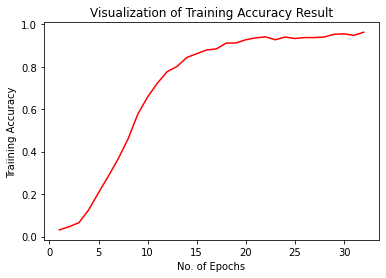

In [44]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

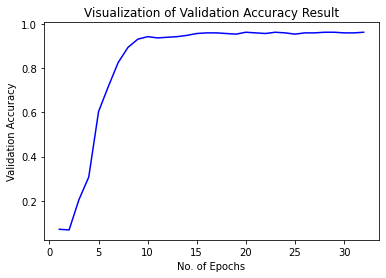

In [45]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [51]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 10s 186ms/step - loss: 0.2127 - accuracy: 0.9638
Test accuracy: 0.9637883305549622
